In [86]:
import pandas as pd               #importing Pandas Library with Alias name pd
import matplotlib.pyplot as plt    #importing matplotlib.pyplot module with Alias name plt
import seaborn as sns              #importing seaborn Library with Alias name sns
import numpy as np               #importing Numpy Library with Alias name np
import scipy.stats as stats

In [12]:
df=pd.read_csv(r"C:\Users\VAMSI\OneDrive\Desktop\Oyasis Infobyte\AB_NYC_2019 ( Data Cleaning).csv")    #Reading CSV File to a data frame.
print(df)                 #Printing the file using a Data Frame

             id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

           host_name neighbourhood_grou

In [16]:
#Checking no.of rows and coloums of the Dataset.
df.shape


(48895, 16)

In [24]:
df.head()   #returns first 5 rows of dataset.

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


In [14]:
df.info()   #returns Brief information of rows, columns, data types, this helps in identifying missing values and NUll values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [20]:
#from Above Result We can see Dataset conatins Total 48895 rows and 16 coloumns. 
#There are some Missing values in name,host_name, last Review,reviews_per_month coloumns.

In [29]:
df.dtypes      #returns Datatypes of Each coloumn.

id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
dtype: object

In [27]:
#in this we can observe that last review coloumn is object, which it contains Date and time values.
#it should be in datetime data type. change it to datetime data type.
#neighbourhood_group,neighbourhood,room_type are categorical variables. so it's better to convert them to category type from object.

In [32]:
df['last_review']=pd.to_datetime(df['last_review'])
df['neighbourhood_group']=df['neighbourhood_group'].astype('category')
df['neighbourhood']=df['neighbourhood'].astype('category')
df['room_type']=df['room_type'].astype('category')

In [33]:
df.dtypes

id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                     category
neighbourhood                           category
latitude                                 float64
longitude                                float64
room_type                               category
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
dtype: object

In [42]:
#Identifying and Eliminating  Duplicate Values for Accurate results of Analysis.
df.duplicated().sum()      #returns sum of how many duplicated values present in dataset.
df.drop_duplicates(inplace=True)    #inplace will remove data from original dataset and will not return a new Df.

In [38]:
#Identifying and Eliminating Null Values
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [55]:
#drop un necessary data coloumns.
#df.drop(['id','name','host_name','last_review'],axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   host_id                         48895 non-null  int64   
 1   neighbourhood_group             48895 non-null  category
 2   neighbourhood                   48895 non-null  category
 3   latitude                        48895 non-null  float64 
 4   longitude                       48895 non-null  float64 
 5   room_type                       48895 non-null  category
 6   price                           48895 non-null  int64   
 7   minimum_nights                  48895 non-null  int64   
 8   number_of_reviews               48895 non-null  int64   
 9   reviews_per_month               38843 non-null  float64 
 10  calculated_host_listings_count  48895 non-null  int64   
 11  availability_365                48895 non-null  int64   
dtypes: category(3), fl

In [58]:
df.fillna({'reviews_per_month':0},inplace=True)  #filling Missing Values with 0.
df.dropna(how='any',inplace=True)    #even after there is a field that conatins NAN Value, it will be removed.
df.isnull().sum()

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [60]:
#Outliers Detection.

df.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [73]:
outlier_columns = [
    'price', 'minimum_nights', 'number_of_reviews', 
    'reviews_per_month', 'calculated_host_listings_count'
]                                                                      #Identifying Outliers.

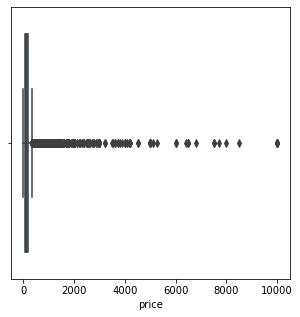

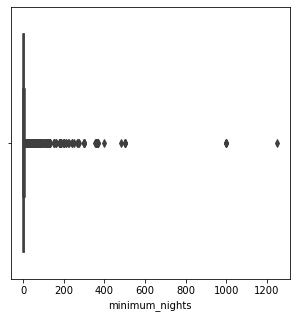

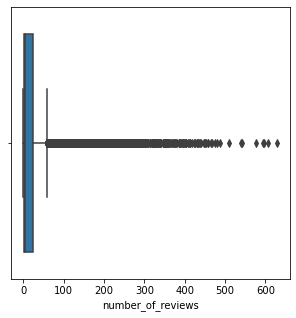

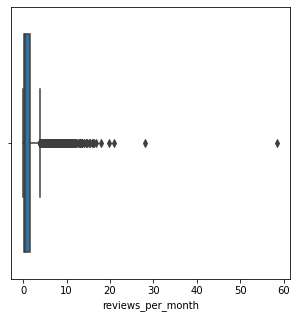

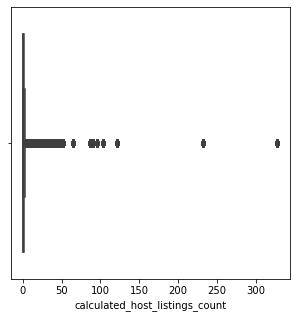

In [80]:
for i in outlier_columns:                                          #plotting outliers.
    plt.figure(figsize=(5,5))
    sns.boxplot(x=df[i])
    plt.show()

In [88]:
# Select numeric columns
df_numeric = df.select_dtypes(include=[np.number])
z_scores = np.abs(stats.zscore(df_numeric))

# DataFrame without outliers
df_wo_outliers = df[(z_scores < 3).all(axis=1)]
df_wo_outliers.shape

(44475, 12)

In [ ]:
----END OF THE PROJECT----